In [5]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as mp
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [6]:
red_wine = pd.read_csv(Path('Resources/Red.csv'))
red_wine.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016


In [7]:
red_wine.dtypes

Name                object
Country             object
Region              object
Winery              object
Rating             float64
NumberOfRatings      int64
Price              float64
Year                object
dtype: object

In [8]:
for i in range(len(red_wine['Price'])):
    if red_wine['Price'][i] >= 38:
        red_wine.at[i,'Price'] = 1
    else:
        red_wine.at[i,'Price'] = 0

In [9]:
red_wine.head(20)

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,1.0,2011
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,0.0,2017
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,0.0,2015
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,0.0,2019
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,0.0,2016
5,Gigondas (Nobles Terrasses) 2017,France,Gigondas,Vieux Clocher,3.7,100,0.0,2017
6,Marion's Vineyard Pinot Noir 2016,New Zealand,Wairarapa,Schubert,4.0,100,1.0,2016
7,Red Blend 2014,Chile,Itata Valley,Viña La Causa,3.9,100,0.0,2014
8,Chianti 2015,Italy,Chianti,Castello Montaùto,3.6,100,0.0,2015
9,Tradition 2014,France,Minervois,Domaine des Aires Hautes,3.5,100,0.0,2014


In [10]:
red_wine.value_counts("Price")

Price
0.0    6476
1.0    2190
dtype: int64

In [11]:
red_wine = red_wine[red_wine.Year != "N.V."]

In [12]:
red_wine.value_counts("Year")

Year
2016    1776
2017    1558
2015    1396
2018    1099
2014     798
2013     564
2012     371
2011     278
2010     174
2005     154
2019     116
2009      84
2008      80
2006      44
2007      43
2004      27
2000      19
1999      15
2001      12
2003      11
2002       7
1997       7
1998       6
1996       5
1995       4
1992       3
1989       2
1990       2
1993       1
1991       1
1988       1
dtype: int64

In [13]:
y = red_wine["Price"]

X = red_wine.drop(columns=["Price", "Name", "Country", "Region", "Winery"])

In [14]:
y.head()

0    1.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Price, dtype: float64

In [15]:
X.head()

,Rating,NumberOfRatings,Year
0,4.2,100,2011
1,4.3,100,2017
2,3.9,100,2015
3,3.5,100,2019
4,3.9,100,2016


In [16]:
y.value_counts()

0.0    6469
1.0    2189
Name: Price, dtype: int64

In [17]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assigned a random_state of 1 to the function

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(6493, 3)

In [18]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
# YOUR CODE HERE!

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                                random_state=1)
classifier

# Fit the model using training data
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [19]:
predictions = classifier.predict(X_test)

In [20]:
balanced_accuracy_score(y_test, predictions)

0.7609322001342304

In [21]:
c_matrix = confusion_matrix(y_test, predictions)
print(c_matrix)

[[1504  114]
 [ 223  324]]


In [22]:
class_report = classification_report(y_test, predictions)
print(class_report)

              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90      1618
         1.0       0.74      0.59      0.66       547

    accuracy                           0.84      2165
   macro avg       0.81      0.76      0.78      2165
weighted avg       0.84      0.84      0.84      2165



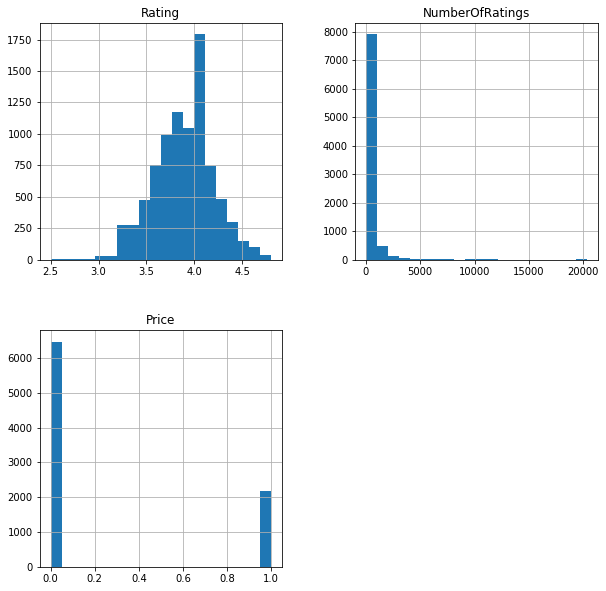

In [23]:
red_wine.hist(bins=20, figsize=(10, 10))
mp.show()

                   Rating  NumberOfRatings     Price
Rating           1.000000         0.070317  0.600192
NumberOfRatings  0.070317         1.000000 -0.020646
Price            0.600192        -0.020646  1.000000


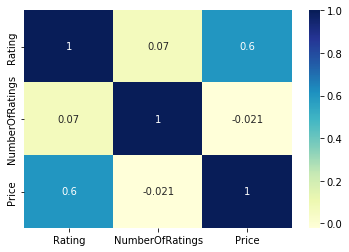

In [24]:
print(red_wine.corr())
dataplot = sb.heatmap(red_wine.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
mp.show()